# The Steps involved in solving a problem in Deep Learning


1. Environment Setup: Import Necessary packages 
2. Loading of Input: Data importing and Exploration, Preprocessing
3. Split the data into two parts: "Training images and Testing images"
4. Building a Deep learningModel:Using appropriate algorithm,Train the model with training image, and saving the model with weights.
5. Model Evaluation: Getting Accuracy for the predicted model 
6. Finally observing the model with testing image to get final prediction.


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization, Activation
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from zipfile import ZipFile
brain_data = '/content/gdrive/My Drive/Brain Tumor Data sets.zip'

with ZipFile(brain_data, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
classes = os.listdir('/content/Brain Tumor Data sets/Training')

In [ ]:
enc = OneHotEncoder()
enc.fit([[0], [1], [2], [3]]) 
def names(number):
    if(number == 0):
        return classes[0]
    elif(number == 1):
        return classes[1]
    elif(number == 2):
        return classes[2]
    elif(number == 3):
        return classes[3]

In [ ]:
trainData = []
trainLabel = []
dim = (150, 150)
trainPath = "/content/Brain Tumor Data sets/Training"
index = 0
for dir in os.listdir(trainPath):
    filePaths = []
    subDir = os.path.join(trainPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        trainData.append(np.array(x))
        trainLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
    
trainData = np.array(trainData)
trainLabel = np.array(trainLabel).reshape(2870, 4)
print(trainData.shape)
print(trainLabel.shape)

glioma_tumor
glioma_tumor
no_tumor
no_tumor
meningioma_tumor
meningioma_tumor
pituitary_tumor
pituitary_tumor
(2870, 150, 150, 3)
(2870, 4)


In [ ]:
testData = []
testLabel = []
dim = (150, 150)
testPath = "/content/Brain Tumor Data sets/Testing"
index = 0
for dir in os.listdir(testPath):
    filePaths = []
    subDir = os.path.join(testPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        testData.append(np.array(x))
        testLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
testData = np.array(testData)
testLabel = np.array(testLabel).reshape(394, 4)
print(testData.shape)
print(testLabel.shape)

glioma_tumor
glioma_tumor
no_tumor
no_tumor
meningioma_tumor
meningioma_tumor
pituitary_tumor
pituitary_tumor
(394, 150, 150, 3)
(394, 4)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))           
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)            

In [ ]:
history = model.fit(trainData, trainLabel,batch_size = 32, epochs = 19, verbose=1,validation_data=(testData, testLabel))

Epoch 1/19
90/90 [==============================] - 57s 631ms/step - loss: 30.7218 - accuracy: 0.4942 - val_loss: 1.6746 - val_accuracy: 0.4772
Epoch 2/19
90/90 [==============================] - 56s 625ms/step - loss: 0.6138 - accuracy: 0.7581 - val_loss: 2.5049 - val_accuracy: 0.5558
Epoch 3/19
90/90 [==============================] - 56s 627ms/step - loss: 0.3802 - accuracy: 0.8500 - val_loss: 2.1397 - val_accuracy: 0.7005
Epoch 4/19
90/90 [==============================] - 57s 631ms/step - loss: 0.2031 - accuracy: 0.9300 - val_loss: 1.8578 - val_accuracy: 0.7030
Epoch 5/19
90/90 [==============================] - 56s 628ms/step - loss: 0.1577 - accuracy: 0.9444 - val_loss: 2.4909 - val_accuracy: 0.7183
Epoch 6/19
90/90 [==============================] - 56s 628ms/step - loss: 0.1544 - accuracy: 0.9434 - val_loss: 2.7145 - val_accuracy: 0.7437
Epoch 7/19
90/90 [==============================] - 57s 628ms/step - loss: 0.1146 - accuracy: 0.9591 - val_loss: 2.7573 - val_accuracy: 0.743

In [ ]:
model.save("brain-tumor-model.h5")

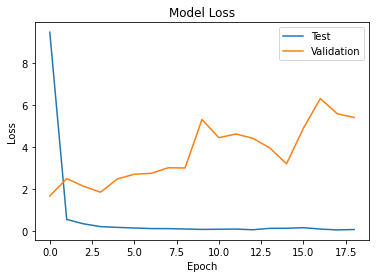

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

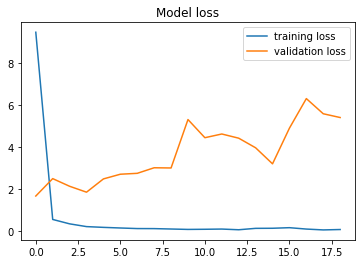

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('Model loss')
plt.legend()
plt.show()

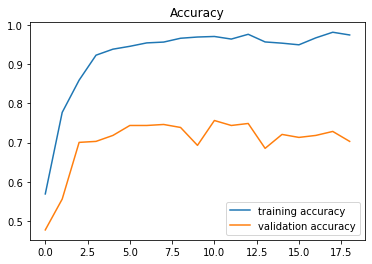

In [ ]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, acc = model.evaluate(testData, testLabel)
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

13/13 [==============================] - 2s 156ms/step - loss: 5.4191 - accuracy: 0.7030
Test Loss = 5.419144630432129
Test Accuracy = 0.703045666217804


28.25445532798767% Confidence This Is pituitary_tumor


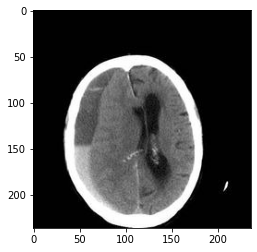

In [ ]:
img = Image.open('/content/Brain Tumor Data sets/Testing/no_tumor/image(1).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

28.25445532798767% Confidence This Is pituitary_tumor


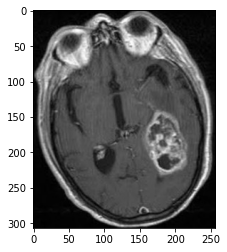

In [ ]:
img = Image.open('/content/Brain Tumor Data sets/Testing/meningioma_tumor/image(10).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [ ]:
img = Image.open('/content/Brain Tumor Data sets/Testing/pituitary_tumor/image(13).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))